<a href="https://colab.research.google.com/github/samihahaha/CSIT696/blob/main/4_HistoricalStockNeuralProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/samihahaha/ResearchMethodsInComputing.git

fatal: destination path 'ResearchMethodsInComputing' already exists and is not an empty directory.


In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd

In [ ]:
pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 15.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x

In [ ]:
from neuralprophet import NeuralProphet

import matplotlib.pyplot as plt


ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [ ]:
ticker_symbol = 'TSLA'

start_date = '2015-01-01'

end_date = '2024-01-01'

tesla_stock = yf.download(ticker_symbol, start= start_date, end= end_date)

print(tesla_stock.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


In [ ]:
tesla_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [ ]:
for col in tesla_stock.columns:
  print(col)

Open
High
Low
Close
Adj Close
Volume


In [ ]:
tesla_stock.to_csv('tesla_stock.csv')

In [ ]:
df = pd.read_csv('tesla_stock.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2264 non-null   float64
 2   High       2264 non-null   float64
 3   Low        2264 non-null   float64
 4   Close      2264 non-null   float64
 5   Adj Close  2264 non-null   float64
 6   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 123.9+ KB


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


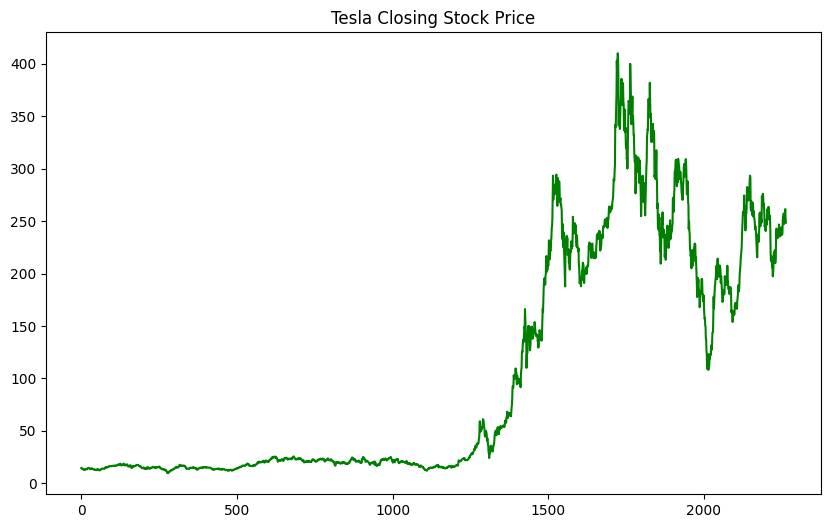

In [ ]:
df = df[['Close']]

df['Close'].plot(title='Tesla Closing Stock Price', figsize=(10, 6), color='green')
plt.show()

In [ ]:
df = pd.read_csv('tesla_stock.csv')



In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

df = df[['ds', 'y']]

In [ ]:
df.head()

,ds,y
0,2015-01-02,14.620667
1,2015-01-05,14.006000
2,2015-01-06,14.085333
3,2015-01-07,14.063333
4,2015-01-08,14.041333


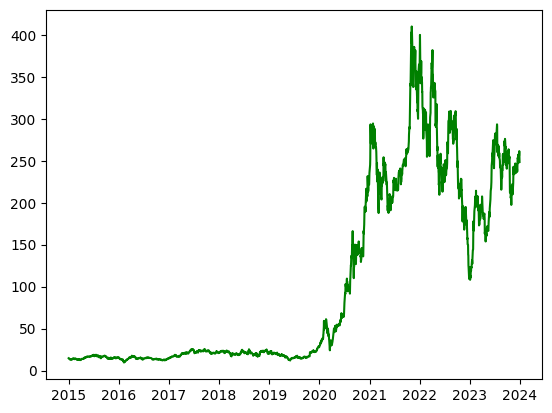

In [ ]:
plt.plot(df['ds'], df['y'], label = 'actual', c = 'g')
plt.show()

In [ ]:
model = NeuralProphet(yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True)
model.fit(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 90
INFO:NP.config:Auto-set epochs to 90
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (36) is too small than the required number                     for t

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,315.538971,386.320892,0.688857,0.0,0
1,249.800018,299.378510,0.512767,0.0,1
2,193.312149,222.353012,0.377681,0.0,2
3,152.125534,168.806107,0.274744,0.0,3
4,107.258430,120.691650,0.178161,0.0,4
...,...,...,...,...,...
85,18.980669,30.344828,0.016917,0.0,85
86,18.943794,30.377005,0.016837,0.0,86
87,19.225992,30.505219,0.017076,0.0,87
88,19.014977,30.094521,0.016692,0.0,88


In [ ]:
future = model.make_future_dataframe(df, periods = 365)

forecast = model.predict(future)

forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2024-01-01,None,218.978149,542.868469,6.783499,-23.653902,-307.019928
1,2024-01-02,None,216.815552,542.787964,6.905613,-24.631498,-308.246552
2,2024-01-03,None,216.085999,542.707458,7.044414,-24.271715,-309.394165
3,2024-01-04,None,216.998718,542.626953,7.197910,-24.509827,-308.316345
4,2024-01-05,None,216.816452,542.546509,7.366233,-25.906820,-307.189453
...,...,...,...,...,...,...,...
360,2025-05-19,None,150.878922,502.294373,-19.606443,-23.718559,-308.090424
361,2025-05-20,None,150.970291,502.213867,-19.787167,-24.496609,-306.959808
362,2025-05-21,None,149.706970,502.133392,-19.917896,-24.454582,-308.053925
363,2025-05-22,None,148.168381,502.052856,-19.998846,-24.536924,-309.348694


In [ ]:
forecast['ds'], forecast['yhat1']

(0     2024-01-01
 1     2024-01-02
 2     2024-01-03
 3     2024-01-04
 4     2024-01-05
          ...    
 360   2025-05-19
 361   2025-05-20
 362   2025-05-21
 363   2025-05-22
 364   2025-05-23
 Name: ds, Length: 365, dtype: datetime64[ns],
 0      218.978149
 1      216.815552
 2      216.085999
 3      216.998718
 4      216.816452
           ...    
 360    150.878922
 361    150.970291
 362    149.706970
 363    148.168381
 364    147.632584
 Name: yhat1, Length: 365, dtype: float32)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


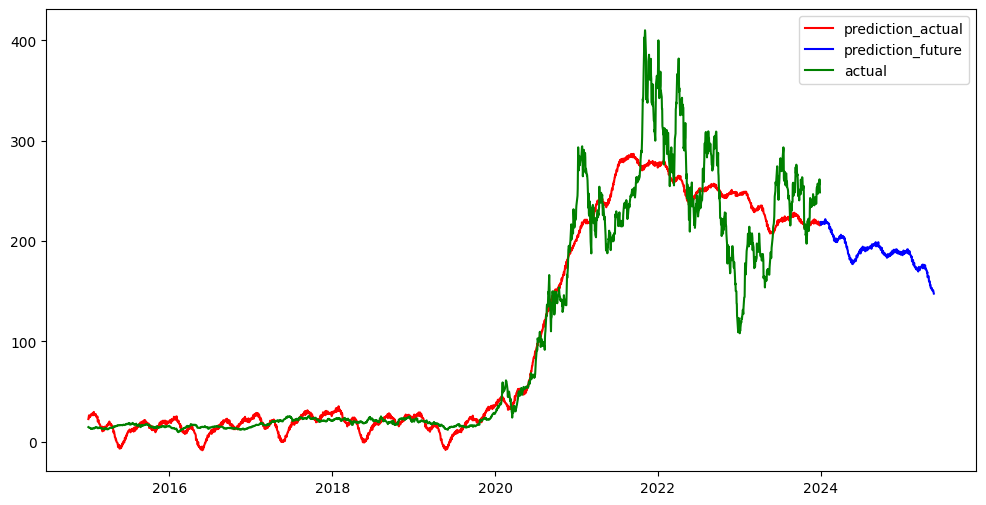

In [ ]:
actual_prediction = model.predict(df)

plt.figure(figsize=(12, 6))

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_actual', c = 'r')

plt.plot(forecast['ds'], forecast['yhat1'], label = 'prediction_future', c = 'b')

plt.plot(df['ds'], df['y'], label = 'actual', c = 'g')

plt.legend()
plt.show()

In [ ]:
model.plot(forecast)


WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [ ]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [ ]:
df = pd.read_csv('tesla_stock.csv')
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df = df[['ds', 'y']]

In [ ]:
train_size = int(len(df) * 0.9)
train_df, test_df = df[:train_size], df[train_size:]

In [ ]:
m = NeuralProphet(yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True)
metrics = m.fit(train_df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.318% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.318% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 90
INFO:NP.config:Auto-set epochs to 90
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (64) is too small than the required number                     for t

Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
future = m.make_future_dataframe(train_df, periods=len(test_df))
forecast = m.predict(future)


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.318% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.318% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.559% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.559% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.559% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 64it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.318% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.318% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.318% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.318% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 64it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


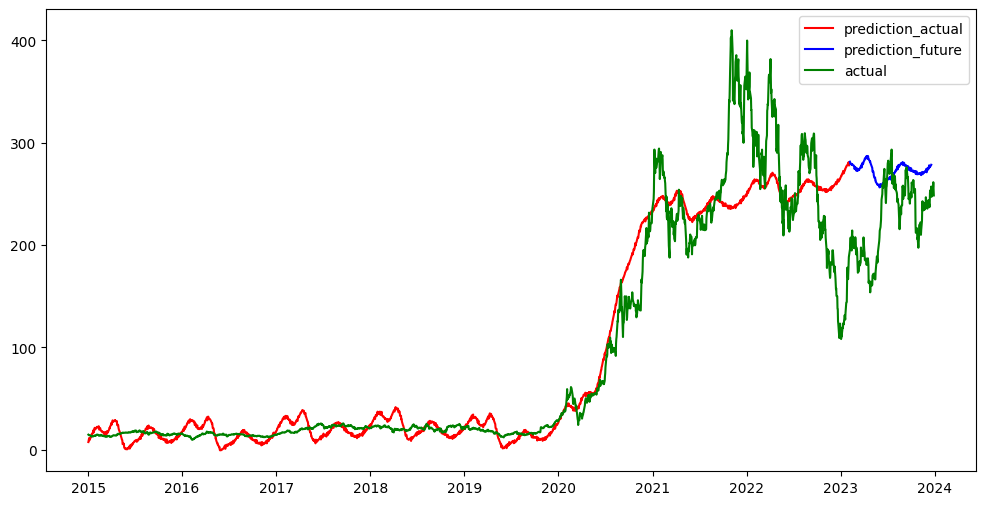

In [ ]:
actual_prediction = m.predict(train_df)

plt.figure(figsize=(12, 6))

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_actual', c = 'r')

plt.plot(forecast['ds'], forecast['yhat1'], label = 'prediction_future', c = 'b')

plt.plot(df['ds'], df['y'], label = 'actual', c = 'g')

plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

predicted = forecast['yhat1'].tail(len(test_df))  # Get the last 'n' predictions corresponding to the test set
actual = test_df['y'].reset_index(drop=True)  # Reset index for accurate comparison

# Calculate performance metrics
mae = mean_absolute_error(actual, predicted)
rmse = mean_squared_error(actual, predicted, squared=False)
mape = mean_absolute_percentage_error(actual, predicted) * 100

print(f"Mean Absolute Error: {mae}")
print(f"Mean Root Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Error: 49.914255890027015
Mean Root Squared Error: 60.99874216067312
Mean Absolute Percentage Error: 25.302391617079458


In [ ]:
if actual.isnull().any() or predicted.isnull().any():
    print("Warning: NaN values found. Dropping NaNs for MAPE calculation.")
    actual = actual.dropna()
    predicted = predicted.dropna()

if (actual == 0).any():
    print("Warning: Zero values found in actual data. Adjusting for MAPE calculation.")
    actual += small_value  # small_value as defined previously

# Calculate MAPE
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Percentage Error: 24.995674037421246%


In [ ]:
!pip install plotly


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2264 non-null   datetime64[ns]
 1   y       2264 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.5 KB


In [ ]:
pip install --pre neuralprophet

In [ ]:
pip install -U kaleido

In [ ]:
from neuralprophet import NeuralProphet, set_log_level


set_log_level("ERROR")
m = NeuralProphet(
    daily_seasonality=False,   # Use if you have intra-day data points
    weekly_seasonality=True,   # True or an integer for Fourier terms
    yearly_seasonality=True    # True or specify the number of Fourier terms if you have multiple years of data
)





#m.set_plotting_backend("plotly-static")

# Continue training the model and making a prediction
metrics = m.fit(df)
model.make_future_dataframe(df, periods = 365)
forecast = m.predict(df)


Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 36it [00:00, ?it/s]

In [ ]:
m.plot(forecast)

In [ ]:
m.plot_components(forecast)

In [ ]:
import pandas as pd
import pytz  # This import is correct but unused in this snippet unless further timezone operations are needed elsewhere

# Fetching data
data = pd.read_csv('tesla_stock.csv')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Localize the timezone to UTC and convert to Eastern Time
data['Date'] = data['Date'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

data['Date'] = data['Date'].dt.date



# Display the data
print(data.head())



         Date       Open       High        Low      Close  Adj Close    Volume
0  2015-01-01  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
1  2015-01-04  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2  2015-01-05  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
3  2015-01-06  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
4  2015-01-07  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2264 non-null   float64
 2   High       2264 non-null   float64
 3   Low        2264 non-null   float64
 4   Close      2264 non-null   float64
 5   Adj Close  2264 non-null   float64
 6   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 123.9+ KB


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2259,2023-12-21,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2260,2023-12-25,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2261,2023-12-26,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2262,2023-12-27,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2263,2023-12-28,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

data = data[['ds', 'y']]

In [ ]:
data.head()

,ds,y
0,2015-01-01,14.620667
1,2015-01-04,14.006000
2,2015-01-05,14.085333
3,2015-01-06,14.063333
4,2015-01-07,14.041333


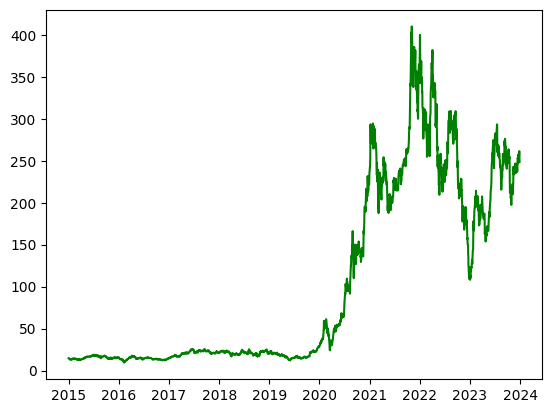

In [ ]:
import matplotlib.pyplot as plt


plt.plot(data['ds'], data['y'], label = 'actual', c = 'g')
plt.show()

In [ ]:
pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet


m = NeuralProphet(daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=True)


m = m.add_country_holidays("US")

metrics = m.fit(data)

future = m.make_future_dataframe(data, periods = 365)

forecast = m.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 90
INFO:NP.config:Auto-set epochs to 90
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (36) is too small than the required number                     for t

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast

,ds,y,yhat1,trend,season_yearly,events_additive,event_Christmas Day,event_Christmas Day (observed),event_Columbus Day,event_Independence Day,...,event_Juneteenth National Independence Day (observed),event_Labor Day,event_Martin Luther King Jr. Day,event_Memorial Day,event_New Year's Day,event_New Year's Day (observed),event_Thanksgiving,event_Veterans Day,event_Veterans Day (observed),event_Washington's Birthday
0,2023-12-29,None,219.012466,210.628510,8.383945,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,2024-01-01,None,209.920059,210.382355,8.517736,-8.980034,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-8.980034,0.0,0.0,0.0,0.0,0.0
2,2024-01-02,None,218.877777,210.300323,8.577461,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2024-01-03,None,218.864029,210.218277,8.645751,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,2024-01-04,None,218.857086,210.136230,8.720840,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2025-05-16,None,149.954605,169.277191,-19.322582,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
361,2025-05-19,None,148.844818,169.031067,-20.186258,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
362,2025-05-20,None,148.579208,168.949051,-20.369833,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
363,2025-05-21,None,148.366241,168.866989,-20.500751,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
m.plot(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.334% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.334% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


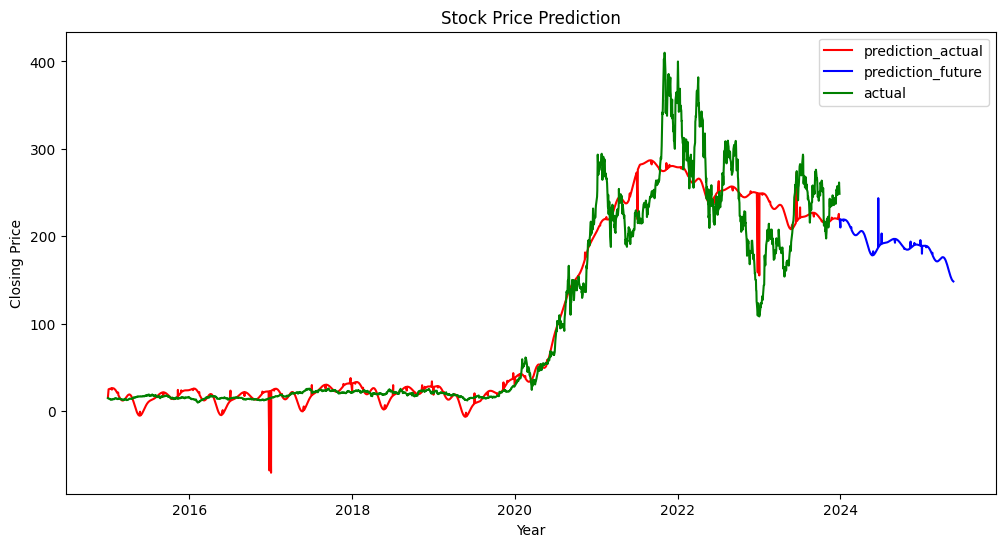

In [ ]:


# Generate predictions
actual_prediction = m.predict(data)


# Plot the actual predictions
plt.figure(figsize=(12, 6))
plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label='prediction_actual', c='r')

# Ensure you are plotting the prediction line for the future forecast
plt.plot(forecast['ds'], forecast['yhat1'], label='prediction_future', c='b')

# Plot the actual data
plt.plot(data['ds'], data['y'], label='actual', c='g')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')

plt.legend()
plt.show()


In [ ]:
m.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [ ]:
m.plot()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
